[2025/07/07 02:00:38] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, use_mlu=False, use_gcu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='C:\\Users\\susil/.paddleocr/whl\\det\\en\\en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='C:\\Users\\susil/.paddleocr/whl\\rec\\en\\en_PP-OCRv4_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48, 320',

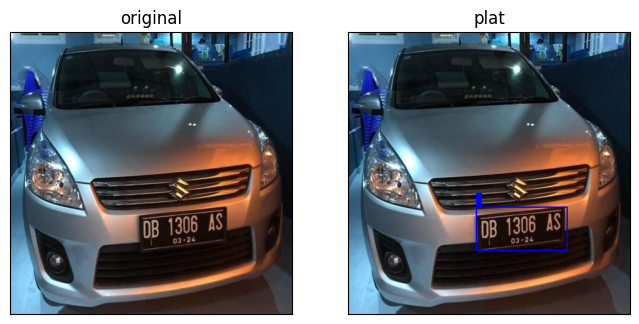

In [ ]:
import cv2
import torch
import os
from paddleocr import PaddleOCR
from ultralytics import YOLO
import numpy as np
from datetime import datetime
from Model.imageProcess import f_image_read, f_image_preprocessing_010, f_save_image, f_imagesingle_read, f_image_box, f_image_box_license, f_image_box_license_2
from Model.generalProcess import f_remove_special_char
from Model.ocrProcess import f_ocr_process
from Model.sqlProcess import f_sql_savePlateIdentification

# Inisialisasi OCR dan Model YOLO
ocr = PaddleOCR(use_angle_cls=True, lang='en')
YoloModelVehicle = YOLO("Yolo/yolov10m.pt")
YoloModelLicenseNumber = YOLO("Yolo/best.pt")

image_path = "DataTraining/deteksi-plat-nomor-kendaraan-cnn-1/test/images/Plat12_jpg.rf.faeea16efc8821c7dad928a7e342f67f.jpg"

frame = cv2.imread(image_path)

# f_image_read(image1=frame, title1="original", image2=frame, title2="plat")

original_frame = frame.copy()

license_plate_results = YoloModelLicenseNumber(original_frame)

for result in license_plate_results:
    for lp_box in result.boxes:
        lx1, ly1, lx2, ly2 = map(int, lp_box.xyxy[0].numpy())
        lp_conf = lp_box.conf[0]

        frame_2 = f_image_box_license_2(frame, lx1, lx2, ly1, ly2, "")

        f_image_read(image1=original_frame, title1="original", image2=frame_2, title2="plat")


